In [25]:
# 如下，因为这个遍历是需要类的定义的，这里用调入其他项目的方式来做，我用这个来调入，
import Ipynb_importer  # 我从网上下载的，放在D:\Anaconda3\DLLs目录中了，你可以自己搜索下载。
from  图的概念性质和实现 import Graph
from 图的概念性质和实现 import GraphAL
from 图的概念性质和实现 import KGraphAL

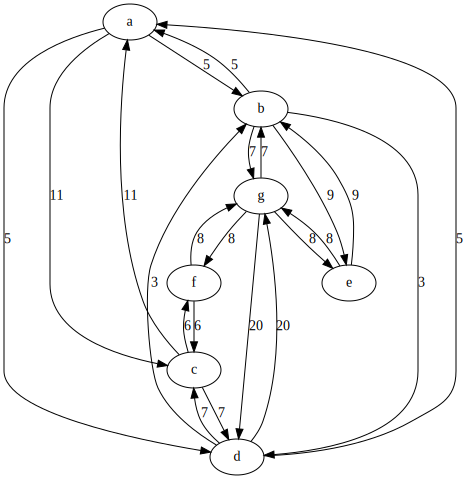

In [36]:
# 因为这个文件涉及到图的遍历，我这里先有一个图吧
graph = KGraphAL(["a", "b", "c", "d", "e", "f", "g"])
graph.add_edge_2("a", "b", 5)
graph.add_edge_2("a", "c", 11)
graph.add_edge_2("c", "f", 6)
graph.add_edge_2("f", "g", 8)
graph.add_edge_2("b", "e", 9)
graph.add_edge_2("b", "g", 7)
graph.add_edge_2("a", "d", 5)
graph.add_edge_2("d", "g", 20)
graph.add_edge_2("c", "d", 7)
graph.add_edge_2("b", "d", 3)
graph.add_edge_2("e", "g", 8)
graph.show()

网咯G存在多个不同的生成树，其中权值最小的生成树称为G的最小生成树（Minimum Spanning Tree MST),但最小生成树可能不唯一。

# Kruskal算法 克鲁斯克尔算法

基本方法：  
设$G=(V,E)$是一个网路，其中$|V|=n$,kruskal构造最小生成树的过程是：  
- 初始时包含G中所有n个顶点但没有任何边的孤立子图$T=(V,{})$,T里的每个顶点自成一个连通分量，下面将通过不断扩充T的方式构造G的最小生成树
- 将边集E中按权值递增的顺序排序，在构造中的每一步顺序的检查这个边序列，找到一条（最短的）两端点位于T中的两个不同连接分量的边e，把e加入T。这导致两个连通分量由于边e的连接而变成一个连通分量。
- 每次操作使得T减少一个连通分量，不断重复这个动作加入新边，直到T中所有顶点都包含在一个连通分量里为止，这个连通分量就是G的一颗最小生成树 

如果这样做不能得到一个包含G的所有顶点的连通分量，则原图不连通，没有最小生成树，算法做出的是G的最小生成树林。

算法的形象描述  
T = (V, {})   
while T中所含边数小于n-1:  
&nbsp;&nbsp;从E中选取当前最小边(u,v)，将他从E中删除
&nbsp;&nbsp;if (u,v)两个端点属于T的不同连通分量  
&nbsp;&nbsp;&nbsp;&nbsp;将边(u,v)加入T

In [37]:
#
def Kurskal(graph):
    """最小生成树"""
    # ####先取得所有的边
    vnum = graph.vertex_num()
    reps = [i for i in range(vnum)]  # 用这个来表示不同的连通分量，初始是每个顶点就是不同的连通分量
    mst , edges = [], []  # mst为最小生成树
    for vi in range(vnum):  # 将所有的边加入edges
        for v, w in graph.out_edges(vi):
            edges.append((w, vi, v))  # w为边的权值，而vi和v是两个顶点
    # ##### 排序
    edges.sort()  # 排序吧
    # ##### 遍历这些边
    for w, vi, vj in edges: # 遍历所有的边，前面已经排序了
        if reps[vi] != reps[vj]:  # 两个端点属于不同连通分量
            mst.append(((vi,vj), w))  # 记录这条边
            if len(mst) == vnum-1:  # 入股有n-1条边，构造完成
                break
            rep, orep = reps[vi], reps[vj]
            for i in range(vnum):    # 合并连通分量，统一代表元
                if reps[i]  == orep:
                    reps[i] = rep
    return mst


权重和36


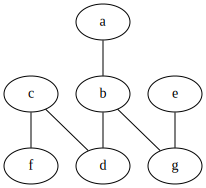

In [38]:
from graphviz import Graph
g =  Graph('最小生成图')
lst_p =[]
sum_w = 0
for v,w in Kurskal(graph):
    vi = graph.get_vertex_name(v[0])
    vj = graph.get_vertex_name(v[1])
    lst_p.append((vi,vj))
    sum_w += w
g.edges(lst_p)
print("权重和{0}".format(sum_w))
g

# Prim算法 普里姆算法

这个算法基于如下的一个性质  
- 设G=(V, E)是一个网络
   - V为顶点集
   - E为边集
- U是V的任一真子集，U也是顶点集合
- 设$e=(u, v)\in E 且 u \in U, v\in V-U$（也就是说，e的一个断在在U里，另一个不存在
   - e是一条边
   - u和v为顶点，不同的是：
      - $u\in U$ u属于这个U集中
      - $v\in V-U$ v不属于这个U集中。
- 而且e在G中所有一个端点在U而另一个端点在V-U的边中权值最小，那么G中必有一颗包含边e的最小生成树

简单证明  
反证法：假设Prim算法生成的不是最小生成树  
- 设prim生成的树为$G_0$
- 假设存在$G_{min}$,使得$cost(G_{min})<cost(G_0)$，则在$G_{min}中存在<u,v>不输入G_0$
- 将$<u, v>加入G_0$可得一个环（因为$G_0$已经连接了所有的点，在加上一条线，肯定有环啦）,且$<u, v>$不是该环的最短边(这是因为$<u,v>\in G_{min}$
- 这与Prim每次生成最短边相矛盾
- 故假设不成立，命题成立

算法描述：
- 输入： 一个加权连通图$G=(V,E)$，其中顶点集合为$V$，边集合为$E$，
- 初始化： $V_{new}={x}$,其中$x$为集合$V$中的任一结点（起始点），$E_{new}=\{\}$，这个新的边集合为空。
- 重复下列操作，直到 $V_{new}=V$
   - 在集合E中选取权值最小的边$<u, v>$,其中u为集合$V_{new}$中的元素，而v不在$V_{new}$中，并且$v\in V$(如果存在有多条满足前述条件的即具有相同权值的边，则可任选其中之一）
   - 将v加入到集合$V_{new}$中，将$<u, v>$加入到集合$E_{new}$中。
- 输出：使用集合$V_{new}$和$E_{new}$来描述所得到的最小生成树。

In [49]:
# 我这里先用一个很简单的概念性东西来做吧。
# 首先，我们这里假设图的存储是邻接表存储。
def Prim_mst(graph):
    """Prim算法"""
    def get_min_edge():
        """取得最小的边"""
        # 我先是取得所有的边
        # 我在前面的邻接表表示有问题，比如某个边，我只在一个顶点有表示，在另一个顶点没有表示。
        # 会造成某个边的顶点在v_new中，但是他的边的表示却在另一个边中。
        _lst_edges = []  # 这个每次都要计算，其实可以放在主函数中，并且用堆来操作，不用每次都添加一次。
        for vi in v_new:  # 遍历已经在v_new的元素
            # 遍历这个顶点的所有出边
            for vj, w in graph.out_edges(vi):
                # 如果这个出边不在以知的顶点中
                if vj not in v_new:
                    # 添加这个出边
                    _lst_edges.append((w,vi,vj))  # 我添加的是一个元素，第一位是权重，后边2个是顶点
        # 这里排序啦
        if len(_lst_edges)>0:
            _lst_edges.sort(key=lambda x:x[0])  # 我只是比较第一个啦,只是权重
            return _lst_edges[0]  # 返回最小的
            pass
        else:
            return None 
    v_new = [0]  # 起始点啦
    e_new = []   # 初始边啦
    vnum = graph.vertex_num()       # 取得有多少个顶点
    while len(v_new) < vnum:        # 这个就是退出条件啦
        _min_edge = get_min_edge()  # 如下是取出最小的边。
        v_new.append(_min_edge[2])  # 然后将新的顶点添加进去
        e_new.append(_min_edge)     # 然后将新的边添加进去。
    return e_new
        

In [50]:
Prim_mst(graph)

[(5, 0, 1), (3, 1, 3), (7, 1, 6), (7, 3, 2), (6, 2, 5), (8, 6, 4)]

权重和36


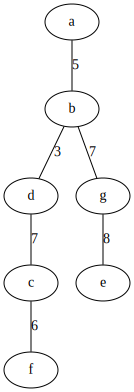

In [48]:
# 这里是测试这个
from graphviz import Graph
g =  Graph('最小生成图')
lst_p =[]
sum_w = 0
for w,vi,vj in Prim_mst(graph):
    vi = graph.get_vertex_name(vi)
    vj = graph.get_vertex_name(vj)
    lst_p.append((vi,vj))
    sum_w += w
    g.edge(vi,vj,str(w))
#g.edges(lst_p)
print("权重和{0}".format(sum_w))
g

## Prim 算法的改进1

升级算法，因为每次都要计算 $u\in V_{new}而v\notin V_{new}$，这里用一个优先队列来表示吧，这里的最小生成树算法用类似DFS生成树构造算法的数据表示，用包含vnum个元素（为图中的顶点数）的表mst记录所构造的最小生成树的边，其元素的形式为$((i,j),w)$,如果元素mst[1]的值是((1,2),10)，表示顶点1已经属于U，且顶点1和2的边在mst中，其权值为10，mst[i]的值是None表示顶点i还不输入U。  
工作中用一个优先队列cands记录候选的最短边，其元素的形式为元素(w,i,j)，表示顶点i到j的侯选边的权值为w，优先队列以w值为优先级，值较小的拍在前面，w值相同不需要控制前后，可任意选择。  
算法过程：  
- 初始将(0,0,0)放入这个优先队列，表示从顶点0，到自身的长为0的边。
- 循环的第一次迭代中先把顶点0计入最小生成树集合U，方法是设置元素mst[0]=((0,0),0),然后把顶点0到其余顶点的边按权值存入优先队列cands，表示待考察的候选边的集合。
- 随后的循环执行中反复选择cands里记录的最短边(u,v),如果确定了它是连接U中顶点与V-U顶点的边，就把这条边的及其标记入mst[v]，并把v的出边存入cands，否则就直接丢弃。


## Prim 算法的改进2